## Decision Tree

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
# Load IRIS dataset
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [13]:
# Split Dataset in Independent and Dependent Features
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [15]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [16]:
y.head()

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object

In [17]:
# Train, Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=42, shuffle=True)

In [18]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()

In [19]:
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

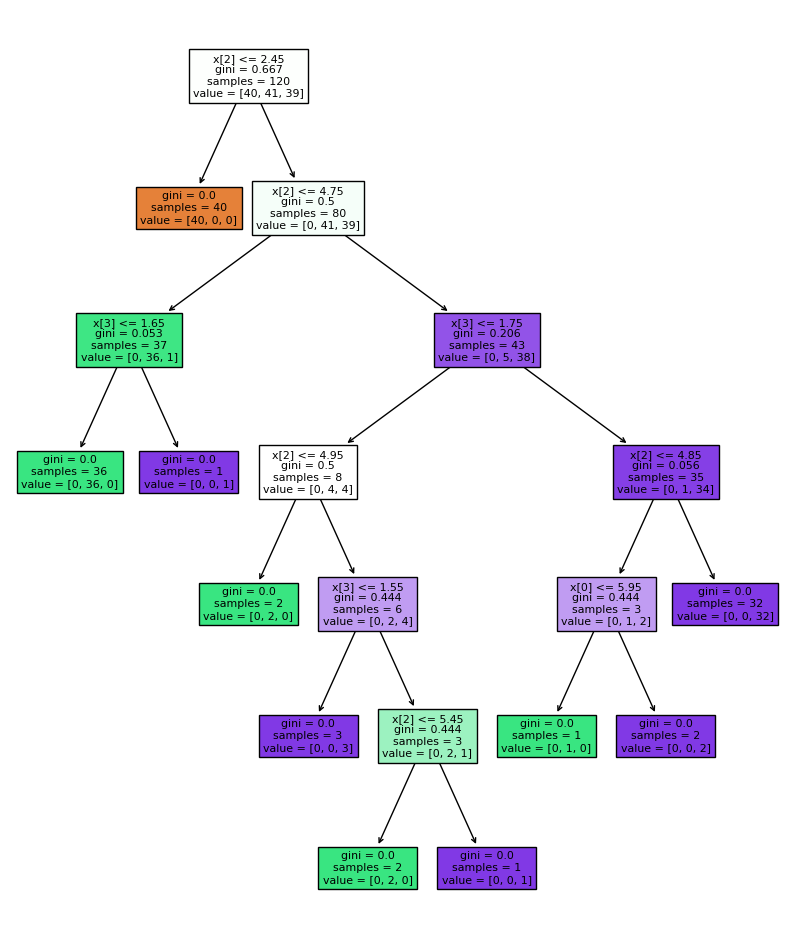

In [22]:
# Draw the Decision Tree
from sklearn import tree
plt.figure(figsize=(10,12))
tree.plot_tree(classifier, filled=True)
plt.show()

In [23]:
# Post Prunning
classifier = DecisionTreeClassifier(max_depth=3)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

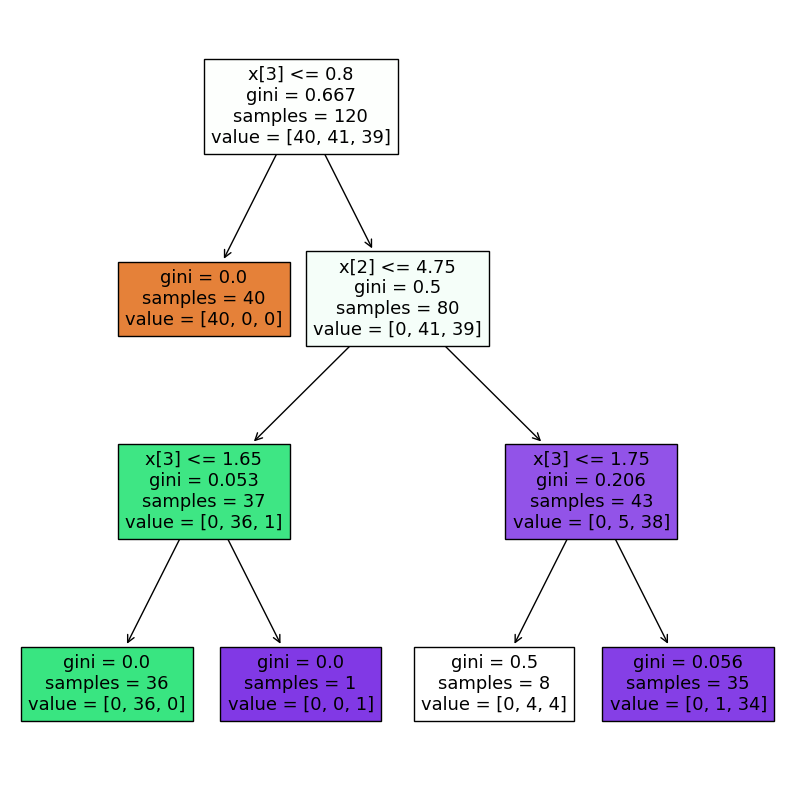

In [26]:
plt.figure(figsize=(10,10))
tree.plot_tree(classifier, filled=True)
plt.show()

In [27]:
# Prediction 
y_pred = classifier.predict(X_test)

In [29]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(accuracy_score(y_test, y_pred))

1.0


In [30]:
print(confusion_matrix(y_test, y_pred))

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [32]:
# Pre-Pruning / Hyperparameter Tuning
import warnings
warnings.filterwarnings('ignore')

In [34]:
parameters = {
    'criterion':['gini', 'entropy', 'log_loss'],
    'splitter':['best', 'random'],
    'max_depth':[1,2,3,4,5],
    'max_features':['auto', 'sqrt', 'log2']
}

In [41]:
from sklearn.model_selection import GridSearchCV
classifier = DecisionTreeClassifier()
clf = GridSearchCV(classifier, param_grid=parameters, cv=5, scoring='accuracy')

In [42]:
clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [43]:
clf.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'auto',
 'splitter': 'best'}

In [46]:
classifier = DecisionTreeClassifier(criterion= 'gini', max_depth= 5, max_features= 'auto', splitter= 'best')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [47]:
accuracy_score(y_test, y_pred)

0.9666666666666667